# Setup

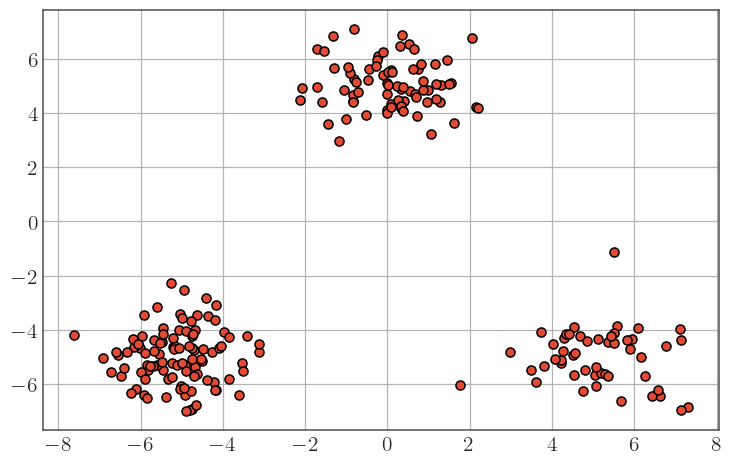

In [ ]:
import numpy as np
import matplotlib as mpl
import pylab as plt
from scipy.stats import multivariate_normal

def get_data():
    np.random.seed(42)
    # training data
    x1 = np.random.normal(size=(100, 2))
    x1 += np.array([-5, -5])
    x2 = np.random.normal(size=(50, 2))
    x2 += np.array([5, -5])
    x3 = np.random.normal(size=(75, 2))
    x3 += np.array([0, 5])
    X = np.vstack((x1, x2, x3))
    return X

X = get_data()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# **Gaussian Mixture Models**
In this notebook, we will look at density modeling with *Gaussian mixture models* (GMMs), which describe the density of a data sample $\boldsymbol{x} \in \mathbb{R}^D$ as
$$
p(\boldsymbol x) = \sum_{k=1}^K \pi_k \mathcal{N}(\boldsymbol x|\boldsymbol \mu_k, \boldsymbol \Sigma_k)\,,\, \text{ with } \boldsymbol{\mu}_k \in \mathbb{R}^D\,,\, \boldsymbol{\Sigma}_k \in \mathbb{R}^{D \times D}\,,\, \pi_k \geq 0\,,\, \sum_{k=1}^K\pi_k = 1.
$$

The goal of this notebook is to get a better understanding of GMMs and to write some code for training GMMs using the *expectation-maximization-algorithm* (EM-algorithm) . We provide a code skeleton and mark the bits and pieces that you need to implement yourself.


We define the responsibilities (which are updated in the E-step), given the model parameters $\pi_k, \boldsymbol\mu_k, \boldsymbol\Sigma_k$ as
$$
r_{nk} = \frac{\pi_k\mathcal N(\boldsymbol
          x_n|\boldsymbol\mu_k,\boldsymbol\Sigma_k)}{\sum_{j=1}^K\pi_j\mathcal N(\boldsymbol
          x_n|\boldsymbol \mu_j,\boldsymbol\Sigma_j)}.
$$          
Given the responsibilities we just defined, we can update the model parameters in the M-step as follows:
\begin{align*}
\boldsymbol\mu_k^\text{new} &= \frac{1}{N_k}\sum_{n = 1}^Nr_{nk}\boldsymbol x_n\,,\\
   \boldsymbol\Sigma_k^\text{new}&= \frac{1}{N_k}\sum_{n=1}^Nr_{nk}(\boldsymbol x_n-\boldsymbol\mu_k)(\boldsymbol x_n-\boldsymbol\mu_k)^\top\,,\\
   \pi_k^\text{new} &= \frac{N_k}{N},
\end{align*}
where $$
N_k = \sum_{n=1}^N r_{nk}.
$$

> **Implement a GMM with the EM-algorithm**

In [ ]:
class GMM:
    """A GMM which is fitted through the EM-algorithm.

    Args:
        K (int): Number of components to be specified.
        n_iterations (int): Number of iterations of performing the EM algorithm.
        random_state (int): Random state to ensure reproducibility.

    """
    def __init__(self, K=3, n_iterations=10, random_state=5):
        self.K = K
        self.n_iterations = n_iterations
        self.random_state = random_state

    def density(self, X):
        """Computes component-wise densities of given samples.

        Args:
            X (array-like):  Samples whose densities are to be computed with shape (N, D).

        Returns:
            ndarray:  Computed densities per sample and component with shape (N, K).
        """
####################
# Your Code Here   #
####################

    def negative_log_likelihood(self, X):
        """Computes negative loglikelihood (NLL) for given samples.

        Args:
            X (array-like): Samples for which NLL is to be computed with shape (N, D).

        Returns:
            float: Computed negative log-likelihood.
        """
####################
# Your Code Here   #
####################

    def fit(self, X, y=None):
        """Fits the GMM by performing the EM-algorithm.

        Args:
            X (array-like): Training samples with shape (N, D).

        Returns:
            self: The fitted GMM.
        """
####################
# Your Code Here   #
####################

    def predict(self, X):
        """Predicts components with highest responsibility per sample.

        Args:
            X (array-like): Samples whose most likely components are to be predicted with shape (N, D).


        Returns:
            ndarray:  Most likely components from which the samples were generated with shape (N).
        """
####################
# Your Code Here   #
####################

    def predict_proba(self, X):
        """Predicts responsibilities of given samples.

        Args:
            X (array-like): Samples (N, D) whose responsibilities are to be computed.

        Returns:
            array-like: Computed responsibilities with shape (N, K).

        """
####################
# Your Code Here   #
####################

    def _set_inital_parameters(self):
        """ Initializes the parameters of the GMM randomly. """
        # Defines random state for reproducibility.
        random_state = np.random.RandomState(self.random_state)
####################
# Your Code Here   #
####################

    def _expectation(self, X):
        """Implements E-step by computing responsibilities.

        Args:
            X (array-like): Samples whose responsibilities are to be computed with shape (N, D).


        Returns:
            array-like: Computed responsibilities with shape (N, K).

        """
####################
# Your Code Here   #
####################

    def _maximization(self, X, R):
        """Implements M-step by updating GMM parameters.

        Args:
            X (array-like): Samples whose responsibilities are to be computed with shape (N, D).
            R (array-like): Responsibilities of samples with (N, K).

        """
####################
# Your Code Here   #
####################

> **Plot the data and the density of the fitted GMM.** You can plot the density by using contour and the provided meshgrid.

In [ ]:
X_mesh, Y_mesh = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
pos = np.column_stack([X_mesh.ravel(), Y_mesh.ravel()])

####################
# Your Code Here   #
####################

In [ ]:
####################
# Your Code Here   #
####################

#### **Questions:**

1. Can the NLL increase while performing the EM-Algorithm?
####################
 Your Text Here   
####################   
   
2. Is the EM-algorithm for the GMM guaranteed to converge?

####################
 Your Text Here   
####################   
   
3. How can we use the NLL as criterion for stopping the training of the GMM?

####################
 Your Text Here   
####################    